In [1]:
# Install necessary packages (not already installed by default on Colab)
!pip install psycopg2-binary

# Import necessary packages
import pandas as pd
import psycopg2

In [2]:
# Connect to the database using psycopg2

db_host = "cpdb.cgod7egsd6vr.us-east-2.rds.amazonaws.com"
db_user = "cpdb-student"
db_password = "dataSci4lyf"
db_name = "cpdb"

connection = psycopg2.connect(host = db_host,  
                              user = db_user, 
                              password = db_password, 
                              dbname = db_name)

connection

<connection object at 0x12290b588; dsn: 'user=cpdb-student password=xxx dbname=cpdb host=cpdb.cgod7egsd6vr.us-east-2.rds.amazonaws.com', closed: 0>

With the connection to the database established, we can begin querying it for the data we need. In the following block, we'll be pulling out all of the complaints that have some summary text associated with them:

In [3]:
# Query the database for text summaries for the complaints and store them in a dataframe
sql_query = "SELECT crid as cr_id, summary FROM data_allegation where summary > '';"
cpdb_nar_df = pd.read_sql(sql_query, con=connection)

cpdb_nar_df

,cr_id,summary
0,1008869,"On 30 August 2007, a complaint was registered ..."
1,1017305,"On June 12, 2008, a complaint was registered w..."
2,1002796,"On 18 January 2007, a complaint was registered..."
3,1003786,"On March 2, 2007, a complaint was registered w..."
4,1006073,"On May 28, 2007, a complaint was registered wi..."
5,1016377,In an incident involving an off on-duty CPD Of...
6,1006441,"On June 9, 2007, a complaint was registered wi..."
7,1028126,"On July 13, 2009, a complaint was registered w..."
8,1028193,In an incident involving forty-four on-duty CP...
9,1030456,In an incident involving three on-duty CPD Off...


With the narratives read in from the database, we'll do some minor cleaning with them by replacing any null summaries with empty strings:

In [4]:
# Replace all null summaries with empty strings
cpdb_nar_df.summary.fillna('', inplace=True)

cpdb_nar_df

,cr_id,summary
0,1008869,"On 30 August 2007, a complaint was registered ..."
1,1017305,"On June 12, 2008, a complaint was registered w..."
2,1002796,"On 18 January 2007, a complaint was registered..."
3,1003786,"On March 2, 2007, a complaint was registered w..."
4,1006073,"On May 28, 2007, a complaint was registered wi..."
5,1016377,In an incident involving an off on-duty CPD Of...
6,1006441,"On June 9, 2007, a complaint was registered wi..."
7,1028126,"On July 13, 2009, a complaint was registered w..."
8,1028193,In an incident involving forty-four on-duty CP...
9,1030456,In an incident involving three on-duty CPD Off...


## **Data Cleaning and Integration with Complaint Summaries**


The CSV file can be read into a Pandas dataframe using the following command:

In [5]:
# Read in the narratives.csv file into a dataframe
nar_df = pd.read_csv(r'narratives.csv',
                     usecols=['cr_id', 'column_name', 'text'],
                     dtype={"cr_id": "str", "column_name": "str", "text": "str"})

nar_df

,cr_id,column_name,text
0,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
1,1050727,Finding,(None Entered)
2,1050727,Allegation,It is alleged by the complainant Sergeant Vict...
3,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
4,1050814,Initial / Intake Allegation,‘The reporting party alleges that he left a\nl...
5,1050814,Finding,(None Entered)
6,1050814,Initial / Intake Allegation,The reporting party alleges that he left a\nle...
7,1050953,Initial / Intake Allegation,The reporting party alleges that he was\ninvol...
8,1050953,Finding,NO AFFIDAVIT
9,1050953,Initial / Intake Allegation,The reporting party alleges that he was\ninvol...


### **Narrative Cleaning**

The narratives provided in this CSV are a little messy and need to be cleaned prior to integrating them with the narratives from the CPDB. We first take all rows that have a column_name of either “Initial / Intake Allegation” or “Allegation”.

In [6]:
# Remove rows where 'column_name' is not in {'Initial / Intake Allegation', 'Allegation'}
nar_df = nar_df[nar_df['column_name'].isin(['Initial / Intake Allegation', 'Allegation'])]

nar_df

,cr_id,column_name,text
0,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
2,1050727,Allegation,It is alleged by the complainant Sergeant Vict...
3,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
4,1050814,Initial / Intake Allegation,‘The reporting party alleges that he left a\nl...
6,1050814,Initial / Intake Allegation,The reporting party alleges that he left a\nle...
7,1050953,Initial / Intake Allegation,The reporting party alleges that he was\ninvol...
9,1050953,Initial / Intake Allegation,The reporting party alleges that he was\ninvol...
10,1050956,Initial / Intake Allegation,The reporting party alleges that the accused\n...
12,1050956,Allegation,\nP.O. Christine TAYLOR alleges that on 29 DE...
13,1050956,Initial / Intake Allegation,The reporting party alleges that the accused\n...


There are a variety of complaints that have summary text that consists entirely of either “(None entered)” or “NO AFFIDAVIT”. These are replaced with an empty string in order to match the format of the complaints from the CPDB:

In [7]:
# Set to text to '' where text = {'(None entered)', 'NO AFFIDAVIT'}
nar_df['text'] = nar_df['text'].replace(['(None entered)', 'NO AFFIDAVIT'], '')

nar_df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cr_id,column_name,text
0,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
2,1050727,Allegation,It is alleged by the complainant Sergeant Vict...
3,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
4,1050814,Initial / Intake Allegation,‘The reporting party alleges that he left a\nl...
6,1050814,Initial / Intake Allegation,The reporting party alleges that he left a\nle...
7,1050953,Initial / Intake Allegation,The reporting party alleges that he was\ninvol...
9,1050953,Initial / Intake Allegation,The reporting party alleges that he was\ninvol...
10,1050956,Initial / Intake Allegation,The reporting party alleges that the accused\n...
12,1050956,Allegation,\nP.O. Christine TAYLOR alleges that on 29 DE...
13,1050956,Initial / Intake Allegation,The reporting party alleges that the accused\n...


The complaints texts also have a bunch of seemingly random carriages returns sprinkled throughout the summaries which are likely the result of the optical character recognition software. These carriages returns are replaced with spaces. We also strip white space from the front and end of the text.

In [8]:
# Replace carriage returns in text with spaces
nar_df['text'] = nar_df['text'].str.replace('\\n', ' ')
nar_df['text'] = nar_df['text'].str.replace('\\r', ' ')

# Trim whitespace from head and tail of the text
nar_df['text'] = nar_df['text'].str.strip()

nar_df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,cr_id,column_name,text
0,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
2,1050727,Allegation,It is alleged by the complainant Sergeant Vict...
3,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
4,1050814,Initial / Intake Allegation,‘The reporting party alleges that he left a le...
6,1050814,Initial / Intake Allegation,The reporting party alleges that he left a lea...
7,1050953,Initial / Intake Allegation,The reporting party alleges that he was involv...
9,1050953,Initial / Intake Allegation,The reporting party alleges that he was involv...
10,1050956,Initial / Intake Allegation,The reporting party alleges that the accused o...
12,1050956,Allegation,P.O. Christine TAYLOR alleges that on 29 DEC 1...
13,1050956,Initial / Intake Allegation,The reporting party alleges that the accused o...


We then remove any rows for which there is no summary remaining:

In [9]:
# Remove rows where there is no value in the text column
nar_df = nar_df[nar_df['text'] != '']

nar_df

,cr_id,column_name,text
0,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
2,1050727,Allegation,It is alleged by the complainant Sergeant Vict...
3,1050727,Initial / Intake Allegation,It is alleged that the accused officer failed ...
4,1050814,Initial / Intake Allegation,‘The reporting party alleges that he left a le...
6,1050814,Initial / Intake Allegation,The reporting party alleges that he left a lea...
7,1050953,Initial / Intake Allegation,The reporting party alleges that he was involv...
9,1050953,Initial / Intake Allegation,The reporting party alleges that he was involv...
10,1050956,Initial / Intake Allegation,The reporting party alleges that the accused o...
12,1050956,Allegation,P.O. Christine TAYLOR alleges that on 29 DEC 1...
13,1050956,Initial / Intake Allegation,The reporting party alleges that the accused o...


Lastly, there are duplicate summaries contained in the set, some of which are different and have varying lengths. Upon further examination of the data, it appears duplicate summaries for a single complaint would have increasing amounts of detail the longer the summary was. We remove duplicates and keep the row that had the longest summary for that complaint. 

In [10]:
# Remove duplicate summaries for a single allegation id (heuristic: take the one with the longer narrative text)
nar_df = nar_df.sort_values('text').drop_duplicates('cr_id', keep='last')
nar_df = nar_df.sort_values('cr_id')

nar_df



,cr_id,column_name,text
3664,1048960,Initial / Intake Allegation,The reporting party alleges that the accused o...
3666,1048962,Initial / Intake Allegation,The victim alleges that an unknown male black ...
3671,1048964,Initial / Intake Allegation,The reporting party alleges that he was a vict...
3676,1048965,Initial / Intake Allegation,The reporting party alleges that while waiting...
3679,1048966,Initial / Intake Allegation,The Reporting Party Victim stated that she tel...
3680,1048967,Initial / Intake Allegation,It is alleged that the accused was inattentive...
3686,1048971,Initial / Intake Allegation,It is reported the accused officer accidentall...
3690,1048973,Initial / Intake Allegation,The Reporting Party Victim alleges that he was...
3693,1048974,Initial / Intake Allegation,The Reporting Party Victim alleges that unknow...
3695,1048976,Initial / Intake Allegation,The complainant alleges that the accused faile...


### **Narrative Integration**

Now that we have both sets of narratives loaded in and cleaned up to the same format, we need to integrate the two datasets into a single dataset. This entails dropping the unnecessary columns and renaming the remaining columns to match the column names of the dataframe of narratives from the CPDB.

In [11]:
# Pull out the needed columns and rename them to align with the allegation_df
subset_nar_df = nar_df[['cr_id', 'text']]
subset_nar_df =  subset_nar_df.rename(columns={"cr_id": "cr_id", "text": "summary"})

subset_nar_df

,cr_id,summary
3664,1048960,The reporting party alleges that the accused o...
3666,1048962,The victim alleges that an unknown male black ...
3671,1048964,The reporting party alleges that he was a vict...
3676,1048965,The reporting party alleges that while waiting...
3679,1048966,The Reporting Party Victim stated that she tel...
3680,1048967,It is alleged that the accused was inattentive...
3686,1048971,It is reported the accused officer accidentall...
3690,1048973,The Reporting Party Victim alleges that he was...
3693,1048974,The Reporting Party Victim alleges that unknow...
3695,1048976,The complainant alleges that the accused faile...


At this point, we can now concatenate these two datasets into a single dataset:

In [12]:
# Concatenate the two datasets
final_df = pd.concat([cpdb_nar_df, subset_nar_df], ignore_index=True)

final_df

,cr_id,summary
0,1008869,"On 30 August 2007, a complaint was registered ..."
1,1017305,"On June 12, 2008, a complaint was registered w..."
2,1002796,"On 18 January 2007, a complaint was registered..."
3,1003786,"On March 2, 2007, a complaint was registered w..."
4,1006073,"On May 28, 2007, a complaint was registered wi..."
5,1016377,In an incident involving an off on-duty CPD Of...
6,1006441,"On June 9, 2007, a complaint was registered wi..."
7,1028126,"On July 13, 2009, a complaint was registered w..."
8,1028193,In an incident involving forty-four on-duty CP...
9,1030456,In an incident involving three on-duty CPD Off...


Now that we have finally joined these two datasets, it is possible there may be duplicate complaint and summaries. To take care of this, we will remove these duplicates and make use of the same heuristic as before: keeping the complaint rows that had the longest summary for that complaint.

In [13]:
# Remove duplicate summaries for a single allegation id (heuristic: take the one with the longer narrative text)
final_df = final_df.sort_values('summary').drop_duplicates('cr_id', keep='last')
final_df = final_df.sort_values('cr_id')

final_df

,cr_id,summary
276,1000214,"On October 4, 2006, a complaint was registered..."
594,1000301,"On October 8, 2006, a complaint was registered..."
598,1000854,"On October 29, 2006, a complaint was registere..."
52,1000936,"On 01 November 2006, a complaint was registere..."
599,1001233,"On November 12, 2006, a complaint was register..."
53,1001242,"On November 12, 2006, a complaint was register..."
490,1001300,"On November 14, 2006, a complaint was register..."
51,1001401,"On 17 November 2006, a complaint was registere..."
491,1001421,"On 18 November 2006, a complaint was registere..."
600,1001562,"On 25 November 2006, a complaint was registere..."


Lastly, we remove any row for which there is no value in the summary column.

In [14]:
# Remove rows where there is no value in the summary column
final_df = final_df[final_df['summary'] != '']
final_df.reset_index()

final_df

,cr_id,summary
276,1000214,"On October 4, 2006, a complaint was registered..."
594,1000301,"On October 8, 2006, a complaint was registered..."
598,1000854,"On October 29, 2006, a complaint was registere..."
52,1000936,"On 01 November 2006, a complaint was registere..."
599,1001233,"On November 12, 2006, a complaint was register..."
53,1001242,"On November 12, 2006, a complaint was register..."
490,1001300,"On November 14, 2006, a complaint was register..."
51,1001401,"On 17 November 2006, a complaint was registere..."
491,1001421,"On 18 November 2006, a complaint was registere..."
600,1001562,"On 25 November 2006, a complaint was registere..."


### **Retrieving final_findings from data_officerallegation in CPDB**


In [15]:
sql_query = \
"SELECT allegation_id as cr_id, final_finding from data_officerallegation WHERE final_finding != '';"

# Execute this query and get the results
complaint_df = pd.read_sql(sql_query, con=connection)

complaint_df

,cr_id,final_finding
0,C132885,SU
1,C149900,SU
2,C151502,SU
3,C152222,SU
4,C157296,SU
5,C181899,SU
6,1007584,SU
7,1008522,SU
8,1009827,SU
9,1016722,SU


This is the last time we will be querying the database, so it's good practice to close the connection:

In [16]:
sql_query = \
"SELECT allegation_id as cr_id, race from data_victim WHERE race != '';"

# Execute this query and get the results
race_df = pd.read_sql(sql_query, con=connection)

race_df

,cr_id,race
0,1063914,Black
1,1064663,Black
2,1064287,Black
3,1065356,Black
4,1065181,Black
5,1066198,White
6,1070806,Black
7,1074576,Black
8,1076620,White
9,1077705,White


In [17]:
# Close the connection to the database
connection.close()

In [18]:
#test
print(type(final_df.iloc[0]['cr_id']))
print(type(complaint_df.iloc[0]['cr_id']))
print(type(race_df.iloc[0]['cr_id']))

<class 'str'>
<class 'str'>
<class 'str'>


With the all of the available category data, we'll now perform an inner join on these two dataframes to associate each complaint and summary with the category it belongs to.

In [19]:
# Join the queried complaint data to the existing set of cleaned and integrated narratives
all_narratives_df = pd.merge(final_df, race_df, on='cr_id')
all_narratives_df = pd.merge(all_narratives_df, complaint_df, on='cr_id')

all_narratives_df

,cr_id,summary,race,final_finding
0,1000214,"On October 4, 2006, a complaint was registered...",Black,SU
1,1000214,"On October 4, 2006, a complaint was registered...",Black,UN
2,1000214,"On October 4, 2006, a complaint was registered...",Black,NS
3,1000214,"On October 4, 2006, a complaint was registered...",Black,SU
4,1000214,"On October 4, 2006, a complaint was registered...",Black,SU
5,1000214,"On October 4, 2006, a complaint was registered...",Black,NS
6,1000214,"On October 4, 2006, a complaint was registered...",Black,SU
7,1000214,"On October 4, 2006, a complaint was registered...",Black,UN
8,1000214,"On October 4, 2006, a complaint was registered...",Black,NS
9,1000214,"On October 4, 2006, a complaint was registered...",Black,SU


This join produces some duplicates, so we'll make sure to remove those:

In [20]:
# Remove duplicates
all_narratives_df = all_narratives_df.drop_duplicates(subset=['cr_id'], keep='first')

all_narratives_df

,cr_id,summary,race,final_finding
0,1000214,"On October 4, 2006, a complaint was registered...",Black,SU
18,1000301,"On October 8, 2006, a complaint was registered...",Black,SU
21,1000854,"On October 29, 2006, a complaint was registere...",Hispanic,NS
25,1001233,"On November 12, 2006, a complaint was register...",Hispanic,SU
29,1001242,"On November 12, 2006, a complaint was register...",White,SU
31,1001300,"On November 14, 2006, a complaint was register...",Black,UN
33,1001421,"On 18 November 2006, a complaint was registere...",White,SU
36,1001562,"On 25 November 2006, a complaint was registere...",Black,SU
38,1001937,"On 08 December 2006, a complaint was registere...",White,SU
40,1001961,"On 13 December 2006, a complaint was registere...",Black,SU


### **Process Narratives into Training and Testing Data**

Now that we have all of the complaints with summaries cleaned and integrated into a single dataset, let's get rid of some samples which would cause class imbalance

For this, we'll apply a threshold on the number of datapoints required for a class and then use Scikit-Learn to create the train / validation / test data split.

In [21]:
all_narratives_df.groupby('final_finding').count()

,cr_id,summary,race
final_finding,,,
EX,194,194,194
NA,3062,3062,3062
NS,598,598,598
SU,526,526,526
UN,334,334,334
ZZ,6,6,6


In [22]:
# Change category to "other_category" if the number of samples for that category is less than a threshold
threshold = 10
new_category_name = "to_be_dropped"
all_narratives_df['final_finding_counts'] = all_narratives_df['final_finding'].map(all_narratives_df['final_finding'].value_counts())

all_narratives_df.loc[all_narratives_df['final_finding_counts'] < threshold, 'final_finding'] = new_category_name
all_narratives_df = all_narratives_df.drop(['final_finding_counts'], axis=1)

all_narratives_df.groupby('final_finding').count()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,cr_id,summary,race
final_finding,,,
EX,194,194,194
NA,3062,3062,3062
NS,598,598,598
SU,526,526,526
UN,334,334,334
to_be_dropped,6,6,6


In [23]:
all_narratives_df = all_narratives_df[all_narratives_df.final_finding != 'to_be_dropped']

In [24]:
all_narratives_df.groupby('final_finding').count()

,cr_id,summary,race
final_finding,,,
EX,194,194,194
NA,3062,3062,3062
NS,598,598,598
SU,526,526,526
UN,334,334,334


In [25]:
all_narratives_df.shape

(4714, 4)

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create the sample arrays
summaries = all_narratives_df['summary'].to_numpy()
classes = all_narratives_df['final_finding'].to_numpy()
races = all_narratives_df['race'].to_numpy()

# Split the data into a 60/20/20 train/validation/test split (making sure the samples are balanced across classes)
x_train, x_test, y_train, y_test = train_test_split(summaries, classes, test_size=0.2, stratify=classes)

x_train_race, x_test_race, y_train_race, y_test_race = train_test_split(races, classes, test_size=0.2, stratify=classes)

"""
# Split the train set into train and validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

# Write out the tsv files, according to the trian/validation/test splits
train_file = open("data/complaints/train_prepped.tsv", "w")
validation_file = open("data/complaints/valid_prepped.tsv", "w")
test_file = open("data/complaints/test_prepped.tsv", "w")

for idx in range(x_train.shape[0]):
	train_file.write(x_train[idx] + "\t" + y_train[idx] + "\n")

for idx in range(x_valid.shape[0]):
	validation_file.write(x_valid[idx] + "\t" + y_valid[idx] + "\n")

for idx in range(x_test.shape[0]):
	test_file.write(x_test[idx] + "\t" + y_test[idx] + "\n")

# Cleanup
train_file.close()
validation_file.close()
test_file.close()
"""

'\n# Split the train set into train and validation set\nx_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)\n\n# Write out the tsv files, according to the trian/validation/test splits\ntrain_file = open("data/complaints/train_prepped.tsv", "w")\nvalidation_file = open("data/complaints/valid_prepped.tsv", "w")\ntest_file = open("data/complaints/test_prepped.tsv", "w")\n\nfor idx in range(x_train.shape[0]):\n\ttrain_file.write(x_train[idx] + "\t" + y_train[idx] + "\n")\n\nfor idx in range(x_valid.shape[0]):\n\tvalidation_file.write(x_valid[idx] + "\t" + y_valid[idx] + "\n")\n\nfor idx in range(x_test.shape[0]):\n\ttest_file.write(x_test[idx] + "\t" + y_test[idx] + "\n")\n\n# Cleanup\ntrain_file.close()\nvalidation_file.close()\ntest_file.close()\n'

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x_train_race.shape)
print(y_train_race.shape)
print(x_test_race.shape)
print(y_test_race.shape)

(3771,)
(3771,)
(943,)
(943,)
(3771,)
(3771,)
(943,)
(943,)


In [28]:
from sklearn.preprocessing import LabelEncoder

# Extract label classes from training data
# (This could just as well have been done using the testing data)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(label_encoder.classes_)
print(label_encoder.transform(label_encoder.classes_))
print()

# Use encoder from above to transform string labels to integer labels
train_labels = label_encoder.transform(y_train)
print(train_labels.shape)
test_labels = label_encoder.transform(y_test)
print(test_labels.shape)

['EX' 'NA' 'NS' 'SU' 'UN']
[0 1 2 3 4]

(3771,)
(943,)


**Vectorization of reports**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(x_train)
print(X_train_counts.shape)
X_test_counts = count_vect.transform(x_test)
print(X_test_counts.shape)

(3771, 8159)
(943, 8159)


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_counts.shape)

(3771, 8159)
(943, 8159)


**Vectorization of race**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts_race = count_vect.fit_transform(x_train_race)
print(X_train_counts_race.shape)
X_test_counts_race = count_vect.transform(x_test_race)
print(X_test_counts_race.shape)

(3771, 9)
(943, 9)


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf_race = tfidf_transformer.fit_transform(X_train_counts_race)
print(X_train_tfidf_race.shape)
X_test_tfidf_race = tfidf_transformer.transform(X_test_counts_race)
print(X_test_tfidf_race.shape)

(3771, 9)
(943, 9)


**Combining Vectorized Input Features**

In [33]:
from scipy.sparse import coo_matrix, hstack

X_train_tfidf = hstack([X_train_tfidf,X_train_tfidf_race]).toarray()

X_test_tfidf = hstack([X_test_tfidf,X_test_tfidf_race]).toarray()


In [34]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(3771, 8168)
(943, 8168)


**Naive Bayes Classifier**

In [35]:
from sklearn.naive_bayes import MultinomialNB
from time import time

t = time()
clf_NB = MultinomialNB().fit(X_train_tfidf, train_labels)
print('Train time: {} s\n'.format(time() - t))

Train time: 0.1139531135559082 s



In [36]:
train_predictions_nb = clf_NB.predict(X_train_tfidf)
test_predictions_nb = clf_NB.predict(X_test_tfidf)

In [37]:
print(train_predictions_nb.shape)
print(test_predictions_nb.shape)

(3771,)
(943,)


In [38]:
label_encoder.classes_

array(['EX', 'NA', 'NS', 'SU', 'UN'], dtype=object)

In [39]:
import numpy as np
from sklearn.metrics import f1_score

# Raw accuracy
print('Accuracy')
print('Train: {}'.format(np.mean(train_predictions_nb == train_labels)))
print('Test:  {}'.format(np.mean(test_predictions_nb == test_labels)))

# F1 Score
print('\nF1 (Averaged)')
print('Labels:  {}         {}         {}          {}         {} '.format(*label_encoder.classes_))
print('Train: {}'.format(f1_score(train_labels, train_predictions_nb, average=None)))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_nb, average=None)))

print('\nF1 (Weighted Average)')
print('Train: {}'.format(f1_score(train_labels, train_predictions_nb, average='weighted')))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_nb, average='weighted')))

Accuracy
Train: 0.6976929196499603
Test:  0.6935312831389183

F1 (Averaged)
Labels:  EX         NA         NS          SU         UN 
Train: [0.         0.81777184 0.00417537 0.55657492 0.        ]
Test:  [0.         0.8111332  0.         0.55629139 0.        ]

F1 (Weighted Average)
Train: 0.5939684096950554
Test:  0.5883606732907423


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Logisitic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

t = time()
lr_model = LogisticRegression(max_iter=200).fit(X_train_tfidf, train_labels)
print('Train time: {} s'.format(time() - t))
print('Iterations: {}'.format(lr_model.n_iter_[0]))

lr_train_pred = lr_model.predict(X_train_tfidf)
lr_test_pred = lr_model.predict(X_test_tfidf)

# Raw accuracy
print('\nAccuracy')
print('Train: {}'.format(np.mean(lr_train_pred == train_labels)))
print('Test:  {}'.format(np.mean(lr_test_pred == test_labels)))

# F1 Score
print('\nF1 (Averaged)')
print('Labels: {}         {}          {}           {}         {} '.format(*label_encoder.classes_))
print('Train: {}'.format(f1_score(train_labels, lr_train_pred, average=None)))
print('Test:  {}'.format(f1_score(test_labels, lr_test_pred, average=None)))

print('\nF1 (Weighted Average)')
print('Train: {}'.format(f1_score(train_labels, lr_train_pred, average='weighted')))
print('Test:  {}'.format(f1_score(test_labels, lr_test_pred, average='weighted')))

Train time: 0.14065098762512207 s
Iterations: 10

Accuracy
Train: 0.7523203394325113
Test:  0.735949098621421

F1 (Averaged)
Labels: EX         NA          NS           SU         UN 
Train: [0.         0.85859649 0.11969112 0.76079347 0.21153846]
Test:  [0.         0.84355617 0.10852713 0.76041667 0.05333333]

F1 (Weighted Average)
Train: 0.6729113171466623
Test:  0.6497314040945275


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Support Vector Machines**

In [41]:
from sklearn import svm

In [42]:
t = time()
clf_svm = svm.SVC()
clf_svm.fit(X_train_tfidf, train_labels)
print('Train time: {} s'.format(time() - t))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train time: 91.19885206222534 s


In [43]:
train_predictions_svm = clf_svm.predict(X_train_tfidf)
test_predictions_svm = clf_svm.predict(X_test_tfidf)

In [44]:
import numpy as np
from sklearn.metrics import f1_score

# Raw accuracy
print('Accuracy')
print('Train: {}'.format(np.mean(train_predictions_svm == train_labels)))
print('Test:  {}'.format(np.mean(test_predictions_svm == test_labels)))

# F1 Score
print('\nF1 (Averaged)')
print('Labels:  {}         {}         {}          {}         {} '.format(*label_encoder.classes_))
print('Train: {}'.format(f1_score(train_labels, train_predictions_svm, average=None)))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_svm, average=None)))

print('\nF1 (Weighted Average)')
print('Train: {}'.format(f1_score(train_labels, train_predictions_svm, average='weighted')))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_svm, average='weighted')))

Accuracy
Train: 0.6496950411031557
Test:  0.6489925768822906

F1 (Averaged)
Labels:  EX         NA         NS          SU         UN 
Train: [0.         0.78765472 0.         0.         0.        ]
Test:  [0.         0.78713826 0.         0.         0.        ]

F1 (Weighted Average)
Train: 0.511735364315297
Test:  0.5108468900989863


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
t = time()
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_tfidf, train_labels)
print('Train time: {} s'.format(time() - t))

Train time: 1.0196521282196045 s


In [47]:
train_predictions_knn = neigh.predict(X_train_tfidf)
test_predictions_knn = neigh.predict(X_test_tfidf)

In [48]:
import numpy as np
from sklearn.metrics import f1_score

# Raw accuracy
print('Accuracy')
print('Train: {}'.format(np.mean(train_predictions_knn == train_labels)))
print('Test:  {}'.format(np.mean(test_predictions_knn == test_labels)))

# F1 Score
print('\nF1 (Averaged)')
print('Labels:  {}         {}         {}          {}         {} '.format(*label_encoder.classes_))
print('Train: {}'.format(f1_score(train_labels, train_predictions_knn, average=None)))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_knn, average=None)))

print('\nF1 (Weighted Average)')
print('Train: {}'.format(f1_score(train_labels, train_predictions_knn, average='weighted')))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_knn, average='weighted')))

Accuracy
Train: 0.7499337045876425
Test:  0.7051961823966065

F1 (Averaged)
Labels:  EX         NA         NS          SU         UN 
Train: [0.1319797  0.86517254 0.23397436 0.72292191 0.15081967]
Test:  [0.         0.83298393 0.10526316 0.65934066 0.02816901]

F1 (Weighted Average)
Train: 0.6885675653995644
Test:  0.6294123389648062


**Decision Tree**

In [49]:
from sklearn import tree

In [50]:
t = time()
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X_train_tfidf, train_labels)
print('Train time: {} s'.format(time() - t))

Train time: 2.1080081462860107 s


In [51]:
train_predictions_tree = clf_tree.predict(X_train_tfidf)
test_predictions_tree = clf_tree.predict(X_test_tfidf)

In [52]:
import numpy as np
from sklearn.metrics import f1_score

# Raw accuracy
print('Accuracy')
print('Train: {}'.format(np.mean(train_predictions_tree == train_labels)))
print('Test:  {}'.format(np.mean(test_predictions_tree == test_labels)))

# F1 Score
print('\nF1 (Averaged)')
print('Labels:  {}         {}         {}          {}         {} '.format(*label_encoder.classes_))
print('Train: {}'.format(f1_score(train_labels, train_predictions_tree, average=None)))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_tree, average=None)))

print('\nF1 (Weighted Average)')
print('Train: {}'.format(f1_score(train_labels, train_predictions_tree, average='weighted')))
print('Test:  {}'.format(f1_score(test_labels, test_predictions_tree, average='weighted')))

Accuracy
Train: 0.7334924423229913
Test:  0.7232237539766702

F1 (Averaged)
Labels:  EX         NA         NS          SU         UN 
Train: [0.02547771 0.85497797 0.         0.7        0.2244898 ]
Test:  [0.         0.83983287 0.         0.72820513 0.16666667]

F1 (Weighted Average)
Train: 0.6505658592783033
Test:  0.6379702237599602


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**N-Gram**

In [53]:
#@title Select n-gram { run: "auto", form-width: "300px" }
#@markdown (1=unigram, 2=bigram, 3=trigram).
n = "3"  #@param [1, 2, 3]
n = int(n)
model = "naive_bayes" #@param ["naive_bayes", "logistic_regression"]
use_tfidf = True #@param {type:"boolean"}
#@markdown <br/><br/>Alternatively, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV)
#@markdown can be used to search the parameter space for the best values.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

models = {'naive_bayes': MultinomialNB(),
          'logistic_regression': LogisticRegression(max_iter=200), 
          'support_vector_machine': svm.SVC(),
          'k_nearest_neighbour': KNeighborsClassifier(n_neighbors=5),
          'decision_tree': tree.DecisionTreeClassifier(max_depth = 3)
         }

# Using a pipeline this time for brevity
pipeline = [
  ('vect', CountVectorizer(ngram_range=(n,n))),
  ('tfidf', TfidfTransformer()),
  (model, models[model])
]

model = Pipeline([element for element in pipeline if (element[0] != 'tfidf') or use_tfidf])

ngram_trained_model = model.fit(x_train, train_labels)

cv = cross_validate(model, x_train, train_labels, cv=4, scoring = ['accuracy', 'f1_weighted'])

ngram_train_predictions = ngram_trained_model.predict(x_train)
ngram_test_predictions = ngram_trained_model.predict(x_test)

# Raw accuracy
print('Accuracy')
print('Train:                   {}'.format(np.mean(ngram_train_predictions == train_labels)))
print('4-fold Cross Validation: {}'.format(np.mean(cv['test_accuracy'])))
print('Test:                    {}'.format(np.mean(ngram_test_predictions == test_labels)))

# F1 Score
print('\nF1')
print('Train:                   {}'.format(f1_score(train_labels, ngram_train_predictions, average='weighted')))
print('4-fold Cross Validation: {}'.format(np.mean(cv['test_f1_weighted'])))
print('Test:                    {}'.format(f1_score(test_labels, ngram_test_predictions, average='weighted')))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy
Train:                   0.737735348713869
4-fold Cross Validation: 0.7194277977882345
Test:                    0.71898197242842

F1
Train:                   0.6463091758677117
4-fold Cross Validation: 0.6184644163880237
Test:                    0.618140286201024


**Sentiment Analysis**

In [54]:
# Install NLTK
!pip install --user -U nltk

# Import NLTK and sentiment analyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Requirement already up-to-date: nltk in /Users/ashishernestrahul/.local/lib/python3.7/site-packages (3.5)


In [55]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ashishernestrahul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [57]:
sentiments = []
pos = 0
neg = 0
neutral = 0

for i in range(all_narratives_df.shape[0]):
    scores = sentiment_analyzer.polarity_scores(all_narratives_df.iloc[i]['summary'])
    sentiments.append(scores["compound"])
    if scores["compound"] > 0:
        pos += 1
    elif scores["compound"] < 0:
        neg += 1
    else:
        neutral += 1

In [58]:
print(all_narratives_df.shape)
print(len(sentiments))
print("Number of reports with positive sentiments: ", pos)
print("Number of reports with negative sentiments: ", neg)
print("Number of reports with neutral sentiments: ", neutral)

(4714, 4)
4714
Number of reports with positive sentiments:  487
Number of reports with negative sentiments:  4031
Number of reports with neutral sentiments:  196


We can see that most of the reports express a negative sentiment 

**Word Cloud**

In [59]:
all_words = ""

for i in range(all_narratives_df.shape[0]):
    all_words += all_narratives_df.iloc[i]['summary']
    #print(i)
    
print(len(all_words))

2078383


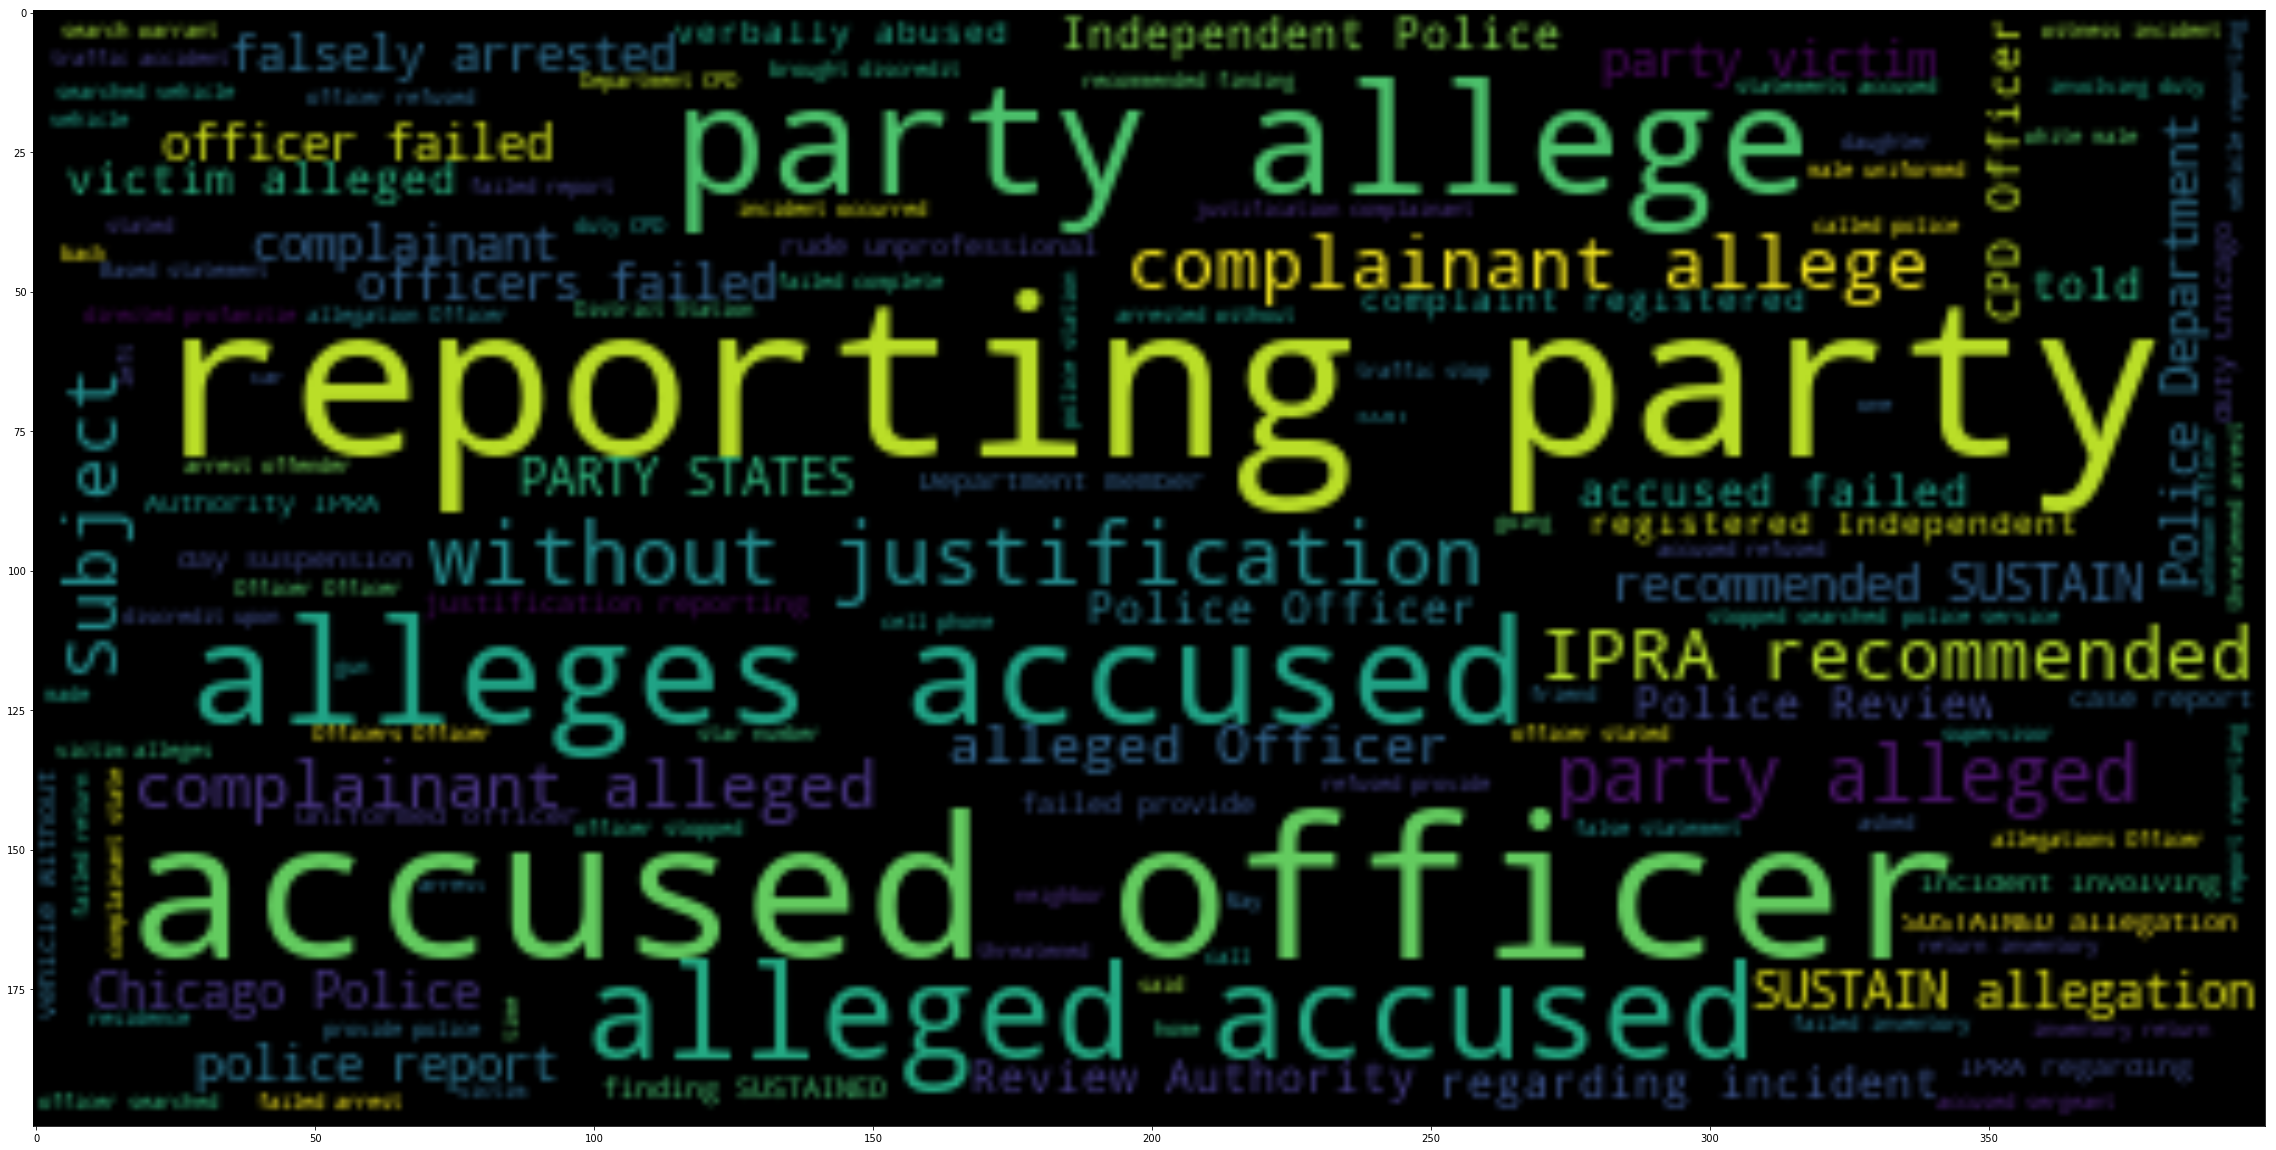

In [61]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


#print(type(summaries))

#print(type(text))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(all_words)

# Display the generated image:
plt.subplots(figsize=(40,40))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
plt.show()